In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
from scipy.stats import bayes_mvs as bayesest
import os #Lib for get the operative system sintaxis
from sklearn import linear_model#Machine learning package for a smart plot fit
from scipy import stats


In [3]:
mu0=np.log(2)
k=np.log(2)
exp=2
dt=0.001
steps=20

[0.10328791213095243, 0.09679371343735227, 0.09844059855701076, 0.09295691330856252, 0.10367699454918264]
[0.13244067426315018, 0.12939440845593003, 0.13849783807058538, 0.12348446679779641, 0.1198554564829156]
[0.1516724530151996, 0.14622296497360876, 0.15592675913927592, 0.16333509748047664, 0.14673281161701293]
[0.150639307218435, 0.18229288079629535, 0.18711069918651252, 0.20725470991203354, 0.19535274725109328]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:182: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:182: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:246: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:246: RuntimeWarning: invalid value encountered in double_scalars


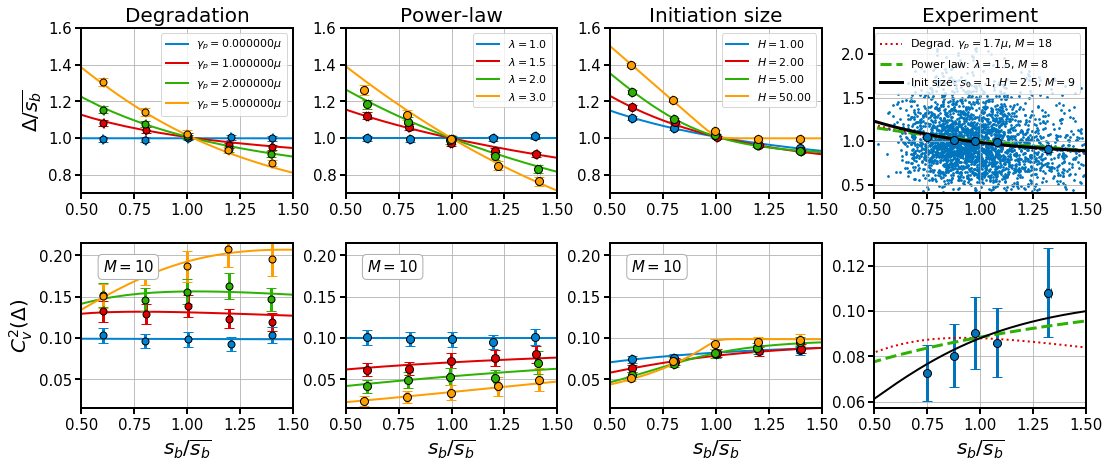

In [12]:
fig, ax = plt.subplots(2,4, figsize=(18,7))
carr=['#0083D1','#E00000','#2DB102','#FF9E00']
for i in [0,1]:
    for j in [0,1,2,3]:
        ax[i,j].grid()
        ax[i,j].tick_params(axis='x', labelsize=15)
        ax[i,j].tick_params(axis='y', labelsize=15)
        ax[i,j].set_xlim([0.5,1.5])
        for axis in ['top','bottom','left','right']:
            ax[i,j].spines[axis].set_linewidth(2)
            ax[i,j].tick_params(axis='both', width=2,length=6)
        
for j in [0,1,2,3]:
    ax[0,j].set_ylim([0.7,1.6])
    ax[1,j].set_ylim([0.015,0.215])
ax[1,3].set_ylim([0.057,0.13])
ax[0,3].set_ylim([0.4,2.3])
    
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.25)

ax[0,0].set_ylabel(r'$\Delta/\overline{s_b}$',size=20)
ax[1,0].set_ylabel(r'$C^2_v(\Delta)$',size=20)
ax[0,0].set_title('Degradation',size=20)
ax[0,1].set_title('Power-law',size=20)
ax[0,2].set_title('Initiation size',size=20)
ax[0,3].set_title('Experiment',size=20)


ax[1,0].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
ax[1,1].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
ax[1,2].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
ax[1,3].set_xlabel(r'$s_b/\overline{s_b}$',size=20)

carr=['#0083D1','#E00000','#2DB102','#FF9E00']
sbarray=np.arange(0.1,6,0.1)
ii=0
###====================================================
gparr=[0,1,2,5]
s0arr=[1,1.27,1.55,2.37]
for gp in gparr:
    tmax=10
    dt=0.001
    mu=np.log(2)

    steps=10
    k=np.log(2)*steps
    gammap=gp*np.log(2)

    sizedivarr=[]
    CV2arr=[]

    u=np.zeros(steps+1)
    sbarray=np.arange(0.1,6,0.1)
    def du(u,sb,t):
        v=np.zeros_like(u)
        s=sb*np.exp(mu*t)
        for l in range(len(u)):
            if l==0:
                v[0]=(-k*s*u[0]+gammap*u[1])*dt
            elif l==len(u)-1:
                v[len(u)-1]=(k*s*u[len(u)-2])*dt
            elif l==len(u)-2:
                v[len(u)-2]=(-k*s*u[len(u)-2]+k*s*u[len(u)-3]-gammap*(len(u)-2)*u[len(u)-2])*dt
            else:
                v[l]=(-k*s*u[l]+k*s*u[l-1]-gammap*l*u[l]+gammap*(l+1)*u[l+1])*dt
        return v

    for sb in sbarray:
        t=0
        count=10
        plim=[]
        tarrayfsp=[]
        u[0]=1
        while t<tmax:
            u+=du(u,sb,t)
            t+=dt
            count+=1
            if count>9:
                plim.append(u[-1])
                tarrayfsp.append(t)
                count=0
        tt=np.array(tarrayfsp)
        h=tt[1]-tt[0]
        rhot=np.diff(plim)/h
        trho=0.5*(tt[1:] + tt[:-1])
        sarray=sb*np.exp(mu*tt)
        ds=np.diff(sarray)
        ss=0.5*(sarray[1:] + sarray[:-1])
        rhos=rhot=np.diff(plim)/ds
        mn=np.trapz(rhos*ss,x=ss)
        var=np.trapz(rhos*(ss)**2,x=ss)
        CV2=(var-mn**2)/(mn-sb)**2
        sizedivarr.append(mn)
        CV2arr.append(CV2)
    ax[0,0].plot(sbarray/s0arr[ii],(np.array(sizedivarr)-np.array(sbarray))/s0arr[ii],lw=2,label='$\gamma_p=%f \mu$ ' %round(gp,1),c=carr[ii])
    ax[1,0].plot(sbarray/s0arr[ii],CV2arr,lw=2,label='$\gamma_p=%f \mu$' %round(gp,1),c=carr[ii])
    ii+=1
##==================================================
ii=0
tmax=10
dt=0.001
mu=np.log(2)
#nsteps=[5,10,18,30]
dsb=[1,1.27,1.55,2.37]
props2 = dict(boxstyle='round',linewidth=1,facecolor='white',edgecolor='#AEAEAE')


steps=[]

gparr=[0,1,2,5]
parray=[10000,10000,10000,10000]
s0arr=[1,1.27,1.55,2.37]
stp=10
for grp in gparr:
    s0r=s0arr[ii]
    pp=parray[ii]
    pop=np.zeros([pp,4])
    for cell in pop:
        u=np.random.uniform(s0r-0.5*s0r,s0r+0.5*s0r)
        cell[0]=u
        cell[1]=cell[0]
    tmax=4
    dt=0.001
    t=0
    while(t<tmax):
        for cell in pop:
            cc=cell[3]            
            if np.random.rand()<stp*cell[1]*np.log(2)*dt:
                cell[3]+=1.
            if np.random.rand()<grp*cc*dt*np.log(2) and cell[3]>0:
                cell[3]+=-1.
            if cell[3]>0.999*stp and cell[2]==0:
                cell[2]=cell[1]
            cell[1]=cell[1]*np.exp(np.log(2)*dt)             
        t+=dt
    v=[]
    for m in range(len(pop)):
        if(np.array(pop)[m,2]-np.array(pop)[m,0])>0:
            v.append([np.array(pop)[m,0]/s0r,(np.array(pop)[m,2]-np.array(pop)[m,0])/s0r])
    quantnumber=5
    v=np.array(v)
    v=pd.DataFrame(v)
    v.columns=['v0','Added']
    quantnumber=5
    pvadd2=v
    CV2d=[]
    delt=[]
    sb=[]
    
    errcv2d=[]
    errdelt=[]
    errsb=[]
    for i in range(quantnumber):
        lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
        hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
        quanta1=pvadd2[pvadd2.v0>lperv0]
        quanta2=quanta1[quanta1.v0<hperv0]  
        mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added,alpha=0.95)
        meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0,alpha=0.95)
        CV2d.append(var_cntr[0]/mean_cntr[0]**2)
        delt.append(mean_cntr[0])
        sb.append(meanv0_cntr[0])
        errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
        errcv2d.append(errv)
        errdelt.append(mean_cntr[1][1]-mean_cntr[0])
        errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
    ax[0,0].errorbar(np.array(sb),np.array(delt),xerr=errsb,yerr=errdelt, fmt='o',mec='k',capsize=5,markersize='7',elinewidth=3,c=carr[ii])
    print(CV2d)
    ax[1,0].errorbar(np.array(sb),CV2d,xerr=errsb,yerr=errcv2d, fmt='o',mec='k',capsize=5,markersize='7',elinewidth=3,c=carr[ii])
    ii+=1

    

ii=0
npop=[10000,5000,2000,1000]
stp=10
lambarr=[1,1.5,2,3]
for lamb in lambarr:
    xx = np.arange(0,3,0.01)
    def rel(x):
        return lamb**(1/lamb)*np.exp((x)**lamb/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb,(x)**lamb/lamb)-2*x
    s0r=scipy.optimize.bisect(rel,0,100)
    pp=npop[ii]
    pop=np.zeros([pp,4])
    for cell in pop:
        u=np.random.uniform(s0r-0.5*s0r,s0r+0.5*s0r)
        cell[0]=u
        cell[1]=cell[0]
    tmax=4
    dt=0.002
    t=0
    while(t<tmax):
        for cell in pop:
            if np.random.rand()<stp*cell[1]**lamb*np.log(2)*dt*np.exp(-stp*cell[1]**lamb*np.log(2)*dt):
                cell[3]+=1.
            if cell[3]>0.99*stp and cell[2]==0:
                cell[2]=cell[1]
            cell[1]=cell[1]*np.exp(np.log(2)*dt)             
        t+=dt
    v=[]
    for m in range(len(pop)):
        if(np.array(pop)[m,2]-np.array(pop)[m,0])>0:
            v.append([np.array(pop)[m,0]/s0r,(np.array(pop)[m,2]-np.array(pop)[m,0])/s0r])
    quantnumber=5
    v=np.array(v)
    v=pd.DataFrame(v)
    v.columns=['v0','Added']
    quantnumber=5
    pvadd2=v
    CV2d=[]
    delt=[]
    sb=[]
    
    errcv2d=[]
    errdelt=[]
    errsb=[]
    for i in range(quantnumber):
        lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
        hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
        quanta1=pvadd2[pvadd2.v0>lperv0]
        quanta2=quanta1[quanta1.v0<hperv0]
    #ax[0].scatter(quanta2.v0/np.mean(pvadd2.v0),quanta2.Added/np.mean(pvadd2.v0),s=3,color='#0075BD')      
        mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added/np.mean(pvadd2.Added),alpha=0.95)
        meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0/np.mean(pvadd2.v0),alpha=0.95)
        CV2d.append(var_cntr[0]/mean_cntr[0]**2)
        delt.append(mean_cntr[0])
        sb.append(meanv0_cntr[0])
        errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
        errcv2d.append(errv)
        errdelt.append(mean_cntr[1][1]-mean_cntr[0])
        errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
    ax[0,1].errorbar(sb,delt,xerr=errsb,yerr=errdelt, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c=carr[ii])
    ax[1,1].errorbar(sb,CV2d,xerr=errsb,yerr=errcv2d, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c=carr[ii])
    ii+=1

exps=[1,1.5,2,3]
ii=0
nsteps=10
for lamb in exps:    
    s0=(1/nsteps)**(1/lamb)
    dt=0.01*(1/nsteps)**(1/lamb)
    tmax=10*(1/nsteps)**(1/lamb)
    xx = np.arange(0,3,0.01)
    def rel(x):
        return lamb**(1/lamb)*np.exp((x)**lamb/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb,(x)**lamb/lamb)-2*x
    s0r=scipy.optimize.bisect(rel,0,100)
    avg=s0*np.exp((xx/s0)**lamb/lamb)*lamb**(1/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb, (xx/s0)**lamb/lamb)
    avg2=s0*s0*lamb**(2/lamb)*np.exp((xx/s0)**lamb/lamb)*scipy.special.gamma(1+2/lamb)*scipy.special.gammaincc(1+2/lamb, (xx/s0)**lamb/lamb)

    ax[0,1].plot(xx/(s0*s0r),((avg-xx)/s0)/(s0r),lw=2,label='$\lambda=%.1f$' %lamb,c=carr[ii])    
    ax[1,1].plot(xx/(s0*s0r),(avg2-avg**2)/(nsteps*(avg-xx)**2),lw=2,label='$\lambda=%f$' %lamb,c=carr[ii])
    ii+=1

    

    
def du(u,sb,t):
    v=np.zeros_like(u)
    s=sb*np.exp(mu*t)
    k=kd(s)
    for l in range(len(u)):
        if l==0:
            v[0]=(-k*s*u[0])*dt
        elif l==len(u)-1:
            v[len(u)-1]=(k*s*u[len(u)-2])*dt
        elif l==len(u)-2:
            v[len(u)-2]=(-k*s*u[len(u)-2]+k*s*u[len(u)-3])*dt
        else:
            v[l]=(-k*s*u[l]+k*s*u[l-1])*dt
    return v

tmax=10
dt=0.001
mu=np.log(2)

steps=10
k=np.log(2)*steps
gammap=0*np.log(2)



Harray=[1,2,5,50]
sarr=[1.45, 1.275 , 1.11, 1.]
ii=0
s0h=1
for H in Harray:
    def kd(s):
        return np.log(2)*steps*1/(1+(s0h/s)**H)
    sizedivarra1=[]
    CV2arra1=[]
    u=np.zeros(steps+1)
    sbarraya1=np.arange(0.1,3,0.02)

    for sb in sbarraya1:
        t=0
        count=10
        plim=[]
        tarrayfsp=[]
        u[0]=1
        while t<tmax:
            u+=du(u,sb,t)
            t+=dt
            count+=1
            if count>9:
                plim.append(u[-1])
                tarrayfsp.append(t)
                count=0
        tt=np.array(tarrayfsp)
        h=tt[1]-tt[0]
        rhot=np.diff(plim)/h
        trho=0.5*(tt[1:] + tt[:-1])
        sarray=sb*np.exp(mu*tt)
        ds=np.diff(sarray)
        ss=0.5*(sarray[1:] + sarray[:-1])
        rhos=rhot=np.diff(plim)/ds
        mn=np.trapz(rhos*ss,x=ss)
        var=np.trapz(rhos*(ss)**2,x=ss)
        CV2=(var-mn**2)/(mn-sb)**2
        sizedivarra1.append(mn)
        CV2arra1.append(CV2)
    ax[1,2].plot(sbarraya1/sarr[ii],np.array(CV2arra1),lw=2,c=carr[ii],label='$H=%i$'%int(H))
    ax[0,2].plot(sbarraya1/sarr[ii],(np.array(sizedivarra1)-np.array(sbarraya1))/sarr[ii],lw=2,c=carr[ii],label='$H=%.2f$'%H)
    ii+=1
srep=1
lamb=1.7
ii=0
npop=[20000,20000,20000,20000]
stp=10
exparr=[1,2,5,50]
ii=0
for exp in exparr:
    xx = np.arange(0,3,0.01)
    s0r=sarr[ii]
    pp=npop[ii]
    pop=np.zeros([pp,4])
    for cell in pop:
        u=np.random.uniform(s0r-0.5*s0r,s0r+0.5*s0r)
        cell[0]=u
        cell[1]=cell[0]
    tmax=4
    dt=0.002
    t=0
    def kk(s):
        return (1/(1+(srep/s)**exp))
    while(t<tmax):
        for cell in pop:
            if np.random.rand()<stp*cell[1]*np.log(2)*kk(cell[1])*dt:
                cell[3]+=1.
            if cell[3]>0.99*stp and cell[2]==0:
                cell[2]=cell[1]
            cell[1]=cell[1]*np.exp(np.log(2)*dt)             
        t+=dt
    v=[]
    for m in range(len(pop)):
        if(np.array(pop)[m,2]-np.array(pop)[m,0])>0:
            v.append([np.array(pop)[m,0]/s0r,(np.array(pop)[m,2]-np.array(pop)[m,0])/s0r])
    quantnumber=5
    v=np.array(v)
    v=pd.DataFrame(v)
    v.columns=['v0','Added']
    quantnumber=5
    pvadd2=v
    CV2d=[]
    delt=[]
    sb=[]
    
    errcv2d=[]
    errdelt=[]
    errsb=[]
    for i in range(quantnumber):
        lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
        hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
        quanta1=pvadd2[pvadd2.v0>lperv0]
        quanta2=quanta1[quanta1.v0<hperv0]
    #ax[0].scatter(quanta2.v0/np.mean(pvadd2.v0),quanta2.Added/np.mean(pvadd2.v0),s=3,color='#0075BD')      
        mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added,alpha=0.95)
        meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0,alpha=0.95)
        CV2d.append(var_cntr[0]/mean_cntr[0]**2)
        delt.append(mean_cntr[0])
        sb.append(meanv0_cntr[0])
        errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
        errcv2d.append(errv)
        errdelt.append(mean_cntr[1][1]-mean_cntr[0])
        errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
    ax[0,2].errorbar(sb,delt,xerr=errsb,yerr=errdelt, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c=carr[ii])
    ax[1,2].errorbar(sb,CV2d,xerr=errsb,yerr=errcv2d, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c=carr[ii])
    ii+=1

    
pvadd2=pd.read_csv('./alldatam2l1filter.csv')
quantnumber=5
CV2d=[]
delt=[]
sb=[]    
errcv2d=[]
errdelt=[]
errsb=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.v0>lperv0]
    quanta2=quanta1[quanta1.v0<hperv0]
    mn=np.mean(quanta2.Added/np.mean(pvadd2.Added))
    #ax[1].scatter(quanta2.v0/np.mean(pvadd2.v0),(quanta2.Added-mn)**2/mn**2,s=1)
    
    mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added/np.mean(pvadd2.v0),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0/np.mean(pvadd2.v0),alpha=0.95)
    CV2d.append(var_cntr[0]/mean_cntr[0]**2)
    delt.append(mean_cntr[0])
    sb.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2d.append(errv)
    errdelt.append(mean_cntr[1][1]-mean_cntr[0])
    errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
xx=np.array(pvadd2.v0.tolist())/np.mean(pvadd2.v0)
yy=np.array(pvadd2.Added.tolist())/np.mean(pvadd2.v0)
ax[0,3].scatter(xx,yy,s=3,color='#0075BD')  
ax[0,3].errorbar(sb,delt,xerr=errsb,yerr=errdelt, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='#0075BD')
ax[1,3].errorbar(sb,CV2d,xerr=errsb,yerr=errcv2d, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='#0075BD')
#ax[1].set_ylim(0.05,0.14)

lamb=1.5
nsteps=8
s0=(1/nsteps)**(1/lamb)
xx = np.arange(0,3,0.01)
def rel(x):
    return lamb**(1/lamb)*np.exp((x)**lamb/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb,(x)**lamb/lamb)-2*x
s0r=scipy.optimize.bisect(rel,0,100)
avg=s0*np.exp((xx/s0)**lamb/lamb)*lamb**(1/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb, (xx/s0)**lamb/lamb)
avg2=s0*s0*lamb**(2/lamb)*np.exp((xx/s0)**lamb/lamb)*scipy.special.gamma(1+2/lamb)*scipy.special.gammaincc(1+2/lamb, (xx/s0)**lamb/lamb)

def du(u,sb,t):
    v=np.zeros_like(u)
    s=sb*np.exp(mu*t)
    for l in range(len(u)):
        if l==0:
            v[0]=(-k*s*u[0]+gammap*u[1])*dt
        elif l==len(u)-1:
            v[len(u)-1]=(k*s*u[len(u)-2])*dt
        elif l==len(u)-2:
            v[len(u)-2]=(-k*s*u[len(u)-2]+k*s*u[len(u)-3]-gammap*(len(u)-2)*u[len(u)-2])*dt
        else:
            v[l]=(-k*s*u[l]+k*s*u[l-1]-gammap*l*u[l]+gammap*(l+1)*u[l+1])*dt
    return v
tmax=10
dt=0.001
mu=np.log(2)
steps=18
k=np.log(2)*steps
gammap=1.7*np.log(2)

sizedivarr05=[]
CV2arr05=[]

sbarray=np.arange(0.1,6,0.1)
for sb in sbarray:
    u=np.zeros(steps+1)
    t=0
    count=10
    plim=[]
    tarrayfsp=[]
    u[0]=1
    while t<tmax:
        u+=du(u,sb,t)
        t+=dt
        count+=1
        if count>9:
            plim.append(u[-1])
            tarrayfsp.append(t)
            count=0
    tt=np.array(tarrayfsp)
    h=tt[1]-tt[0]
    rhot=np.diff(plim)/h
    trho=0.5*(tt[1:] + tt[:-1])
    sarray=sb*np.exp(mu*tt)
    ds=np.diff(sarray)
    ss=0.5*(sarray[1:] + sarray[:-1])
    rhos=rhot=np.diff(plim)/ds
    mn=np.trapz(rhos*ss,x=ss)
    var=np.trapz(rhos*(ss)**2,x=ss)
    CV2=(var-mn**2)/(mn-sb)**2
    sizedivarr05.append(mn)
    CV2arr05.append(CV2)

s0h=1.
steps=9
def kd(s):
    return np.log(2)*steps*1/(1+(s0h/s)**2.5)
def du(u,sb,t):
    v=np.zeros_like(u)
    s=sb*np.exp(mu*t)
    k=kd(s)
    for l in range(len(u)):
        if l==0:
            v[0]=(-k*s*u[0])*dt
        elif l==len(u)-1:
            v[len(u)-1]=(k*s*u[len(u)-2])*dt
        elif l==len(u)-2:
            v[len(u)-2]=(-k*s*u[len(u)-2]+k*s*u[len(u)-3])*dt
        else:
            v[l]=(-k*s*u[l]+k*s*u[l-1])*dt
    return v

tmax=10
dt=0.001
mu=np.log(2)


k=np.log(2)*steps
gammap=0*np.log(2)

sizedivarr01a=[]
CV2arr01a=[]


sbarray2=np.arange(0.5,3,0.01)
for sb in sbarray2:
    u=np.zeros(steps+1)
    t=0
    count=10
    plim=[]
    tarrayfsp=[]
    u[0]=1
    while t<tmax:
        u+=du(u,sb,t)
        t+=dt
        count+=1
        if count>9:
            plim.append(u[-1])
            tarrayfsp.append(t)
            count=0
    tt=np.array(tarrayfsp)
    h=tt[1]-tt[0]
    rhot=np.diff(plim)/h
    trho=0.5*(tt[1:] + tt[:-1])
    sarray=sb*np.exp(mu*tt)
    ds=np.diff(sarray)
    ss=0.5*(sarray[1:] + sarray[:-1])
    rhos=rhot=np.diff(plim)/ds
    mn=np.trapz(rhos*ss,x=ss)
    var=np.trapz(rhos*(ss)**2,x=ss)
    CV2=(var-mn**2)/(mn-sb)**2
    sizedivarr01a.append(mn)
    CV2arr01a.append(CV2)

ax[0,3].plot(sbarray/1.55,(np.array(sizedivarr05)-np.array(sbarray))/1.55,lw=2,label='Degrad. $\gamma_p=1.7\mu$, $M=18$',c='#E00000',linestyle='dotted')
ax[1,3].plot(sbarray/1.55,np.array(CV2arr05),lw=2,c='#E00000',linestyle='dotted')
ax[0,3].plot(xx/(s0*s0r),((avg-xx)/s0)/(s0r),lw=3,label='Power law: $\lambda=1.5$, $M=8$',c='#2DB102',linestyle='dashed')    
ax[1,3].plot(xx/(s0*s0r),(avg2-avg**2)/(nsteps*(avg-xx)**2),lw=3,c='#2DB102',linestyle='dashed')
ax[1,3].plot(sbarray2/1.25,np.array(CV2arr01a),lw=2,c='k')
ax[0,3].plot(sbarray2/1.25,(np.array(sizedivarr01a)-np.array(sbarray2))/1.25,lw=3,c='k',label='Init size: $s_0=1$, $H=2.5$, $M=9$')
#ax[1,3].legend(fontsize=11)
for j in[0,1,2,3]:
    ax[0,j].legend(fontsize=11,loc='upper right')
ax[1,0].text(0.6,0.18,'$M=10$',fontsize=15,bbox=props2)
ax[1,1].text(0.6,0.18,'$M=10$',fontsize=15,bbox=props2)
ax[1,2].text(0.6,0.18,'$M=10$',fontsize=15,bbox=props2)

plt.savefig('./Exp2pan.eps',bbox_inches='tight',dpi=600)
plt.savefig('./Exp2pan.svg',bbox_inches='tight',dpi=600)

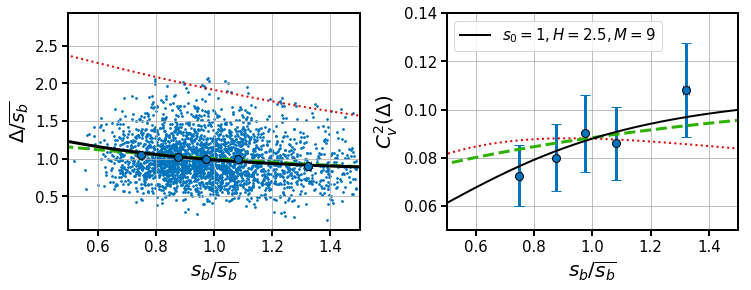

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
pvadd2=pd.read_csv('./alldatam2l1filter.csv')
quantnumber=5
CV2d=[]
delt=[]
sb=[]    
errcv2d=[]
errdelt=[]
errsb=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.v0>lperv0]
    quanta2=quanta1[quanta1.v0<hperv0]
    mn=np.mean(quanta2.Added/np.mean(pvadd2.Added))
    #ax[1].scatter(quanta2.v0/np.mean(pvadd2.v0),(quanta2.Added-mn)**2/mn**2,s=1)
    
    mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added/np.mean(pvadd2.v0),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0/np.mean(pvadd2.v0),alpha=0.95)
    CV2d.append(var_cntr[0]/mean_cntr[0]**2)
    delt.append(mean_cntr[0])
    sb.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2d.append(errv)
    errdelt.append(mean_cntr[1][1]-mean_cntr[0])
    errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
xx=np.array(pvadd2.v0.tolist())/np.mean(pvadd2.v0)
yy=np.array(pvadd2.Added.tolist())/np.mean(pvadd2.v0)
ax[0].scatter(xx,yy,s=3,color='#0075BD')  
ax[0].errorbar(sb,delt,xerr=errsb,yerr=errdelt, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='#0075BD')
ax[1].errorbar(sb,CV2d,xerr=errsb,yerr=errcv2d, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='#0075BD')
ax[1].set_ylim(0.05,0.14)

lamb=1.5
nsteps=8
s0=(1/nsteps)**(1/lamb)
xx = np.arange(0,3,0.01)
def rel(x):
    return lamb**(1/lamb)*np.exp((x)**lamb/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb,(x)**lamb/lamb)-2*x
s0r=scipy.optimize.bisect(rel,0,100)
avg=s0*np.exp((xx/s0)**lamb/lamb)*lamb**(1/lamb)*scipy.special.gamma(1+1/lamb)*scipy.special.gammaincc(1+1/lamb, (xx/s0)**lamb/lamb)
avg2=s0*s0*lamb**(2/lamb)*np.exp((xx/s0)**lamb/lamb)*scipy.special.gamma(1+2/lamb)*scipy.special.gammaincc(1+2/lamb, (xx/s0)**lamb/lamb)

ax[0].plot(sbarray/1.55,(np.array(sizedivarr05)-np.array(sbarray))/1.55,lw=2,label='Degrad. $\gamma_p=1.7\mu$, $M=18$',c='#E00000',linestyle='dotted')
ax[1].plot(sbarray/1.55,np.array(CV2arr05),lw=2,c='#E00000',linestyle='dotted')
ax[0].plot(xx/(s0*s0r),((avg-xx)/s0)/(s0r),lw=3,label='$\lambda=%.1f$' %lamb,c='#2DB102',linestyle='dashed')    
ax[1].plot(xx/(s0*s0r),(avg2-avg**2)/(nsteps*(avg-xx)**2),lw=3,c='#2DB102',linestyle='dashed')
ax[1].plot(sbarray2/1.25,np.array(CV2arr01a),lw=2,c='k',label='$s_0=1,H=2.5,M=9$')
ax[0].plot(sbarray2/1.25,(np.array(sizedivarr01a)-np.array(sbarray2))/1.25,lw=3,c='k')
ax[1].legend(fontsize=15)
ax[0].set_xlim(0.5,1.5)
ax[1].set_xlim(0.5,1.5)
for i in [0,1]:
    ax[i].grid()
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(2)
        ax[i].tick_params(axis='both', width=2,length=6)
        #ax[i].legend(fontsize=15)
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.3)
ax[0].set_ylabel(r'$\Delta/\overline{s_b}$',size=20)
ax[1].set_ylabel(r'$C^2_v(\Delta)$',size=20)
#ax[0,1].set_ylabel(r'$\Delta$',size=20)
#ax[1,1].set_ylabel(r'$C_v^2(\Delta)$',size=20)

#ax[0,0].set_title('Degradation',size=20)
#ax[1].set_title('Power-law',size=20)
#ax[2].set_title('Experiment',size=20)


ax[0].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
ax[1].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
plt.savefig('./Exp3.eps',bbox_inches='tight',dpi=600)
plt.savefig('./Exp3.svg',bbox_inches='tight',dpi=600)
#ax[0].plot(sbarray/1.2,(np.array(sizedivarr06)-np.array(sbarray))/1.5,lw=4,label='Degrad: $\gamma_p=1.7\mu,n=18$',c='k',linestyle='dotted')
#ax[1].plot(sbarray/1.2,np.array(CV2arr06),lw=4,c='k',label='Degrad: $\gamma_p=1.7\mu,n=18$',linestyle='dotted')

In [14]:
srep=1
lamb=1.7
ii=0
npop=[200,200,200,200]
stp=10
stparr=[3,5,9,15]
#exparr=[1,2,5,50]
s0r=1.
pp=10000
rprom=10
pprom=100
kp=(1+10)*np.log(2)*pprom/rprom
kr=rprom*(1+5)*np.log(2)
pop=np.zeros([pp,7])
gp=10*np.log(2)
mompop=[]
for cell in pop:
    u=np.random.uniform(s0r-0.5*s0r,s0r+0.5*s0r)
    cell[0]=u
    cell[1]=cell[0]
    cell[4]=1
    cell[3]=0
    cell[5]=rprom/1.5
    cell[6]=pprom/1.5
    cell[2]=0
tmax=10
dt=0.001
t=0
mnsz=[]
corarr=[]

def H(p):
    return 1/(1+(p/30))
cnt=0
while(t<6):
    for cell in pop:
        if np.random.rand()<stp*cell[1]*np.log(2)*dt*H(cell[6]/cell[1]):
            cell[3]+=1.
        if cell[3]>0.99*stp:
            cell[1]=0.5*cell[1]
            cell[5]=np.random.binomial(cell[5],0.5)
            cell[6]=cell[6]/2
            cell[3]=0
            
            if t>4 and cell[2]==0:
                #print(cell[1])
                cell[2]=2*cell[1]
            if cell[2]==0:
                cell[0]=cell[1]
        
        cell[6]+=kp*cell[5]*dt-gp*cell[6]*dt
        if np.random.rand()<kr*dt:
            cell[5]+=1
        if np.random.rand()<5*np.log(2)*cell[5]*dt:
            cell[5]+=-1
        cell[1]=cell[1]*np.exp(np.log(2)*dt) 
    cnt+=1
    if cnt>100:
        mompop.append(pop[0,6]/pop[0,1])
        corarr.append(np.corrcoef(pop[:,1],pop[:,6]/pop[:,1])[0,1])
        mnsz.append(np.mean(pop[:,1]))
        cnt=0
    t+=dt
    #print(np.mean(pop[:,1]))

0.999980079828579
0.999992761857105
0.0874649734452345


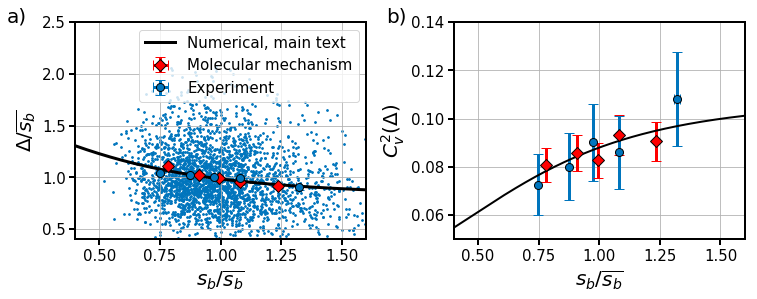

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i in [0,1]:
    ax[i].grid()
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(2)
        ax[i].tick_params(axis='both', width=2,length=6)
        #ax[i].legend(fontsize=15)
#ax[1].grid()
#ax[0].grid()
ax[0].set_ylim([0.4,2.5])
ax[1].set_ylim([0.01,0.43])

ax[0].text(0.12,2.5,'a)',fontsize=20)
ax[1].text(0.12,0.14,'b)',fontsize=20)

ax[0].set_xlim([0.4,1.6])
ax[1].set_xlim([0.4,1.6])
#ax[1].text(0.45,0.36,r'$M=10,s_0=k_d/\lambda$',fontsize=15,bbox=props2)

#ax[1].legend(fontsize=12,facecolor='white',loc='upper right')
props2 = dict(boxstyle='round',linewidth=1,facecolor='white',edgecolor='#AEAEAE')
#ax[0].text(0.5,1.55,'$M=10$',fontsize=15,bbox=props2)
ax[0].set_ylabel(r'$\Delta/\overline{s_b}$',size=20)
ax[1].set_ylabel(r'$C^2_v(\Delta)$',size=20)

ax[0].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
ax[1].set_xlabel(r'$s_b/\overline{s_b}$',size=20)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
v=[]
for m in range(len(pop)):
    if(np.array(pop)[m,2]-np.array(pop)[m,0])>0:
        v.append([np.array(pop)[m,0]/s0r,(np.array(pop)[m,2]-np.array(pop)[m,0])/s0r])
v=np.array(v)
v=pd.DataFrame(v)
v.columns=['v0','Added']
quantnumber=5
pvadd2=v
CV2d=[]
delt=[]
sb=[]
    
errcv2d=[]
errdelt=[]
errsb=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.v0>lperv0]
    quanta2=quanta1[quanta1.v0<hperv0]
    #ax[0].scatter(quanta2.v0/np.mean(pvadd2.v0),quanta2.Added/np.mean(pvadd2.v0),s=3,color='#0075BD')      
    mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added/np.mean(pvadd2.Added),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0/np.mean(pvadd2.v0),alpha=0.95)
    CV2d.append(var_cntr[0]/mean_cntr[0]**2)
    delt.append(mean_cntr[0])
    sb.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2d.append(errv)
    errdelt.append(mean_cntr[1][1]-mean_cntr[0])
    errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
#ax[0].scatter(v.v0,v.Added,s=10)
ax[0].errorbar(np.array(sb),np.array(delt),xerr=errsb,yerr=errdelt, fmt='D',mec='k',capsize=5,markersize='8',elinewidth=3,c='r',label="Molecular mechanism")
ax[1].errorbar(np.array(sb),CV2d,xerr=errsb,yerr=errcv2d, fmt='D',mec='k',capsize=5,markersize='8',elinewidth=3,c='r')
ax[1].set_ylim([0.06,0.14])
print(np.mean(sb))
print(np.mean(delt))

pvadd2=pd.read_csv('./alldatam2l1filter.csv')
quantnumber=5
CV2d=[]
delt=[]
sb=[]    
errcv2d=[]
errdelt=[]
errsb=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.v0,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.v0,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.v0>lperv0]
    quanta2=quanta1[quanta1.v0<hperv0]
    mn=np.mean(quanta2.Added/np.mean(pvadd2.Added))
    #ax[1].scatter(quanta2.v0/np.mean(pvadd2.v0),(quanta2.Added-mn)**2/mn**2,s=1)
    
    mean_cntr, var_cntr, std_cntr = bayesest(quanta2.Added/np.mean(pvadd2.v0),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.v0/np.mean(pvadd2.v0),alpha=0.95)
    CV2d.append(var_cntr[0]/mean_cntr[0]**2)
    delt.append(mean_cntr[0])
    sb.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2d.append(errv)
    errdelt.append(mean_cntr[1][1]-mean_cntr[0])
    errsb.append(meanv0_cntr[1][1]-meanv0_cntr[0])
xx=np.array(pvadd2.v0.tolist())/np.mean(pvadd2.v0)
yy=np.array(pvadd2.Added.tolist())/np.mean(pvadd2.v0)
ax[0].scatter(xx,yy,s=3,color='#0075BD')  
ax[0].errorbar(sb,delt,xerr=errsb,yerr=errdelt, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='#0075BD',label='Experiment')
ax[1].errorbar(sb,CV2d,xerr=errsb,yerr=errcv2d, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='#0075BD')
ax[1].set_ylim(0.05,0.14)
print(np.mean(CV2d))
ax[1].plot(sbarray2/1.25,np.array(CV2arr01a),lw=2,c='k',label='$s_0=1,H=2.5,M=9$')
ax[0].plot(sbarray2/1.25,(np.array(sizedivarr01a)-np.array(sbarray2))/1.25,lw=3,c='k',label='Numerical, main text')
ax[0].legend(fontsize=15,loc='upper right')
plt.savefig('./simvsexp.eps',bbox_inches='tight',dpi=600)
plt.savefig('./simvsexp.svg',bbox_inches='tight',dpi=600)
